In [65]:
import ast
import pandas as pd
import numpy as np
import sklearn
#import joblib
from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPRegressor
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn import preprocessing, decomposition, manifold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#plotting
import matplotlib
import matplotlib.pyplot as plt

#3d plotting
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt
#plt.ion()

# Load dataset

In [66]:
df_toptracks_features_analysis = pd.read_csv("./dataset/toptracks_ratings_features_analysis.csv")
df_toptracks_features_analysis

,id,name,range,rating,id_copy,energy,danceability,loudness,valence,tempo,speechiness,acousticness,instrumentalness,duration_ms,time_signature,pitch_avg,timbre_avg,key_change_percentage,mode_avg,id_copy_2
0,7L5IwfKB6W0tadcSh9wlyH,Ouverture,short_term,5.393939,7L5IwfKB6W0tadcSh9wlyH,0.3360,0.4960,-19.440,0.1850,129.006,0.0513,0.95500,0.912000,322173,4,"[0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.0...","[36.4, -140.17, -20.32, -18.11, 13.38, -37.86,...",75.000000,0.14,7L5IwfKB6W0tadcSh9wlyH
1,0tAZi3X7dUdd7m8OXB8pMA,Shadow,short_term,5.272727,0tAZi3X7dUdd7m8OXB8pMA,0.2750,0.0832,-15.256,0.0334,170.316,0.0347,0.88700,0.853000,558267,1,"[0.18, 0.26, 0.64, 0.5, 0.16, 0.26, 0.16, 0.21...","[40.29, -65.03, 29.6, -16.94, 3.88, -26.49, -1...",93.333333,0.86,0tAZi3X7dUdd7m8OXB8pMA
2,1XMDIKQbV30WJPKLMN6MKv,INSTRUCTION,short_term,4.969697,1XMDIKQbV30WJPKLMN6MKv,0.3550,0.4910,-12.480,0.0369,145.405,0.0354,0.38200,0.887000,262733,4,"[0.51, 0.26, 0.22, 0.12, 0.12, 0.2, 0.21, 0.39...","[38.23, -65.25, -37.01, -15.68, 9.7, -36.31, 2...",75.000000,0.36,1XMDIKQbV30WJPKLMN6MKv
3,1XZdwzd8DTDvkjVc0eJ9BI,Wildlife Analysis,short_term,4.909091,1XZdwzd8DTDvkjVc0eJ9BI,0.0204,0.1550,-31.212,0.2780,79.755,0.0462,0.99500,0.936000,75627,4,"[0.12, 0.06, 0.43, 0.1, 0.56, 0.08, 0.08, 0.16...","[28.95, -181.05, 81.47, 3.86, 94.46, -38.57, -...",0.000000,0.33,1XZdwzd8DTDvkjVc0eJ9BI
4,1f4cKwcKfNiLbQr8x2tZ3C,Melt!,short_term,4.848485,1f4cKwcKfNiLbQr8x2tZ3C,0.9190,0.7850,-13.059,0.4430,131.037,0.0552,0.00772,0.916000,214307,4,"[0.63, 0.68, 0.49, 0.41, 0.46, 0.5, 0.56, 0.53...","[36.82, 22.73, -62.74, 44.28, 36.1, -56.15, -1...",85.714286,0.56,1f4cKwcKfNiLbQr8x2tZ3C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2OqtZbITDWCFUHAT9fmdin,Choses nouvelles,long_term,4.242424,2OqtZbITDWCFUHAT9fmdin,0.3830,0.6690,-12.993,0.5690,140.011,0.0385,0.46500,0.856000,234600,4,"[0.36, 0.36, 0.31, 0.19, 0.24, 0.25, 0.45, 0.2...","[42.33, -84.86, -38.32, -18.36, -1.64, -23.54,...",90.909091,0.45,2OqtZbITDWCFUHAT9fmdin
234,6EPRKhUOdiFSQwGBRBbvsZ,Ace of Spades,long_term,4.181818,6EPRKhUOdiFSQwGBRBbvsZ,0.9100,0.3420,-7.748,0.5470,140.452,0.0758,0.00004,0.000121,166360,4,"[0.31, 0.43, 0.34, 0.66, 0.67, 0.54, 0.46, 0.3...","[51.29, 89.0, 28.24, -10.6, 3.43, -30.31, -2.3...",80.000000,0.50,6EPRKhUOdiFSQwGBRBbvsZ
235,4Jj8pWRyVjh0KIJLrcreRa,Here We Go Jack,long_term,4.121212,4Jj8pWRyVjh0KIJLrcreRa,0.3090,0.6790,-10.606,0.4730,163.979,0.0320,0.58500,0.907000,237938,4,"[0.29, 0.49, 0.36, 0.16, 0.52, 0.21, 0.28, 0.1...","[41.27, -87.94, -54.71, -3.61, 1.01, -23.17, 4...",87.500000,0.75,4Jj8pWRyVjh0KIJLrcreRa
236,3v9g8iM3v5irWQHqFWaDSo,Cómo Te Quiero,long_term,4.060606,3v9g8iM3v5irWQHqFWaDSo,0.2770,0.6080,-11.917,0.4370,126.501,0.0282,0.62200,0.896000,242536,4,"[0.32, 0.22, 0.24, 0.16, 0.39, 0.14, 0.23, 0.4...","[40.47, -62.61, 3.05, -1.31, -12.6, -24.89, -1...",88.888889,0.73,3v9g8iM3v5irWQHqFWaDSo


# Convert dataset to numpy array and clean/prepare for training

In [67]:
# convert dataframe rows into arrays. Every array in the 2d array is a row
features = df_toptracks_features_analysis[
    ["name", "energy", "danceability", "loudness", "valence", "tempo", 
     "speechiness", "acousticness", "instrumentalness", "duration_ms", "time_signature", 
    "pitch_avg", "timbre_avg", "key_change_percentage", "mode_avg"]].to_numpy()

#only features
#features = df_toptracks_features_analysis[["name", "energy", "danceability", "loudness", "valence", "tempo", "speechiness", "acousticness", "instrumentalness"]].to_numpy()
#only analysis
#features = df_toptracks_features_analysis[["name", "pitch_avg", "timbre_avg", "key_change_percentage", "mode_avg"]].to_numpy()

# define 5 classes
classes = np.array(["bad", "okay", "good", "great"])

# convert all ratings from 0 - 10 into 0 - 4, to match the classes
labels = df_toptracks_features_analysis["rating"].to_numpy()
labels = np.round([label/10*3 for label in labels]).astype("int")

print("features", features[0])
print(features.shape)
print("\n")
print("--------------------")
print("classes:", classes)
print(classes.shape)
print("\n")
print("--------------------")
print("labels:", labels)
print(labels.shape)

features ['Ouverture' 0.336 0.496 -19.44 0.185 129.006 0.0513 0.955 0.912 322173 4
 '[0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.07, 0.08, 0.27, 0.57, 0.19]'
 '[36.4, -140.17, -20.32, -18.11, 13.38, -37.86, 3.36, 1.33, -6.62, 3.97, -0.23, 9.65]'
 75.0 0.14]
(238, 15)


--------------------
classes: ['bad' 'okay' 'good' 'great']
(4,)


--------------------
labels: [2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(238,)


### clean features

In [68]:
# cleaned features
features_cleaned = features

# Substitute titles with integers
for i in range(features_cleaned.shape[0]):
    features_cleaned[i][0] = i

features_cleaned[0]

array([0, 0.336, 0.496, -19.44, 0.185, 129.006, 0.0513, 0.955, 0.912,
       322173, 4,
       '[0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.07, 0.08, 0.27, 0.57, 0.19]',
       '[36.4, -140.17, -20.32, -18.11, 13.38, -37.86, 3.36, 1.33, -6.62, 3.97, -0.23, 9.65]',
       75.0, 0.14], dtype=object)

In [69]:
# convert the timbre and pitch vectors, which are actually strings in the dataframe imported, to lists again
for row in range(features_cleaned.shape[0]):
    for col in range(features_cleaned.shape[1]):
        if type(features_cleaned[row][col]) == str:
            features_cleaned[row][col] = ast.literal_eval(features_cleaned[row][col])

print(features_cleaned[0])

[0 0.336 0.496 -19.44 0.185 129.006 0.0513 0.955 0.912 322173 4
 list([0.27, 0.58, 0.21, 0.27, 0.18, 0.34, 0.26, 0.07, 0.08, 0.27, 0.57, 0.19])
 list([36.4, -140.17, -20.32, -18.11, 13.38, -37.86, 3.36, 1.33, -6.62, 3.97, -0.23, 9.65])
 75.0 0.14]


In [70]:
# unpack/flatten the timbre and pitch lists within the 2d features_cleaned
# (and subesequently extent the coloumn size of the feature array.)

def flatten(x):
    for item in x:
        try:
            #if x has a member (item) it means its a a list or array, therefore we feed the item back into the function.
            yield from flatten(item)
        #so if x has no members to iterate on (i.e its a float or integer), we return it (yield)
        except TypeError:
            yield item

temp_features = np.empty([])
for i in range(features_cleaned.shape[0]):
    
    # flatten row
    row = list(flatten(features_cleaned[i]))
    
    # round all values in row to 2 decimals max
    #row = [round(elem, 2) for elem in row]
    
    # make numpy array of row
    row = np.array(row)
    
    # add them together
    if i == 0:
        temp_features = row
    else:
        temp_features = np.vstack((temp_features, row))

# add to final variable
features_cleaned = temp_features

print(features_cleaned.shape)
print(features_cleaned[0])

(238, 37)
[ 0.00000e+00  3.36000e-01  4.96000e-01 -1.94400e+01  1.85000e-01
  1.29006e+02  5.13000e-02  9.55000e-01  9.12000e-01  3.22173e+05
  4.00000e+00  2.70000e-01  5.80000e-01  2.10000e-01  2.70000e-01
  1.80000e-01  3.40000e-01  2.60000e-01  7.00000e-02  8.00000e-02
  2.70000e-01  5.70000e-01  1.90000e-01  3.64000e+01 -1.40170e+02
 -2.03200e+01 -1.81100e+01  1.33800e+01 -3.78600e+01  3.36000e+00
  1.33000e+00 -6.62000e+00  3.97000e+00 -2.30000e-01  9.65000e+00
  7.50000e+01  1.40000e-01]


In [71]:
# simple scaling of features

scaler = StandardScaler()

# learning the scaling
scaler.fit(features_cleaned)

# apply the scaling
features_cleaned = scaler.transform(features_cleaned)

print(features_cleaned.shape)
print(features_cleaned[0])

(238, 37)
[-1.72478851 -0.8850498  -0.16291797 -1.33401665 -0.89911006  0.26935514
 -0.0437082   1.73852202  1.28350816  0.55031166  0.25240304 -1.0076595
  0.84408526 -0.96069087 -0.18697604 -1.10001101  0.15926726 -0.49106958
 -2.16469688 -1.85848402 -0.40012895  2.49376614 -0.95492962 -1.21048634
 -1.93032954 -0.50973086 -0.85398972 -0.15551792 -1.00441942  0.40583306
  0.42694018 -0.06342728  1.05298995  1.79386087  1.86721825 -0.48468213
 -2.26164083]


# Visualising the features

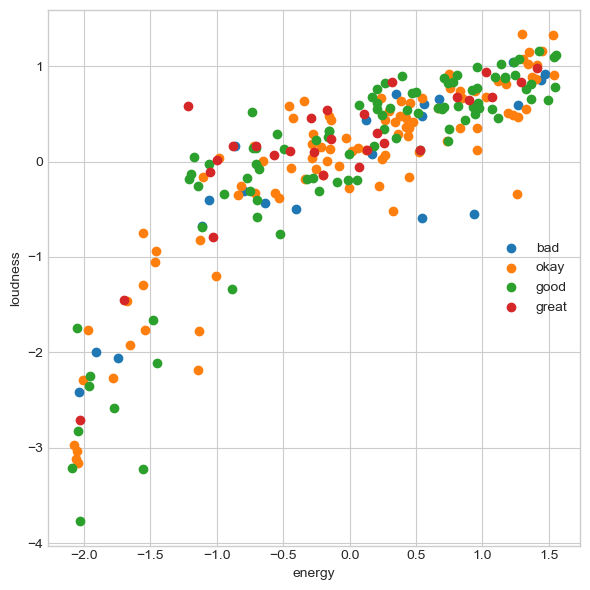

In [72]:
#Plotting the features in a 2D scatter plot
#we can plot up to 2 features (or you can attempt a 3D plot) 
#we also include an histrogram (different view of the same data)

axis1 = 1 #energy
axis2 = 3 #loudness

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(features_cleaned[labels==lab_val, axis1],
                    features_cleaned[labels==lab_val, axis2],
                    label=lab_name
                    )
    plt.xlabel("energy")
    plt.ylabel("loudness")
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()

# Dimensionality reduction

# PCA

(238, 37)
(238, 37)


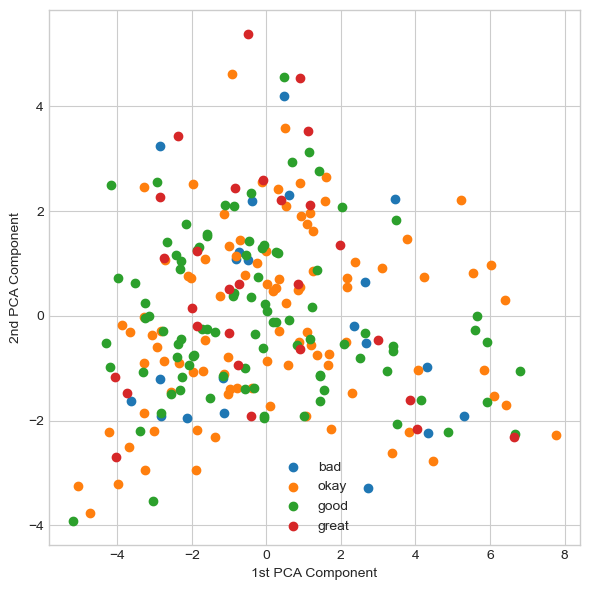

In [40]:
#Creating an instance of a PCA object, which is an object capable of learning and applying PCA from/to data.
#if we want to keep only a given number of components we can use the argument "n_components"
pca = sklearn.decomposition.PCA()

#This will learn PCA projection from data, mind that we are using the features only
pca.fit(features_cleaned)

#Now we project the data into a from a 7D to a new 7D space (the principal components)
features_projected = pca.transform(features_cleaned)

#the dimensionality should be the same as the feature
print(features_cleaned.shape)
print(features_projected.shape)

#Plot the distribution of the data according to the first two PCA components
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(features_projected[labels==lab_val, 0],
                    features_projected[labels==lab_val, 1],
                    label=lab_name)
    plt.xlabel('1st PCA Component')
    plt.ylabel('2nd PCA Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

### LDA

(238, 37)
(238, 3)


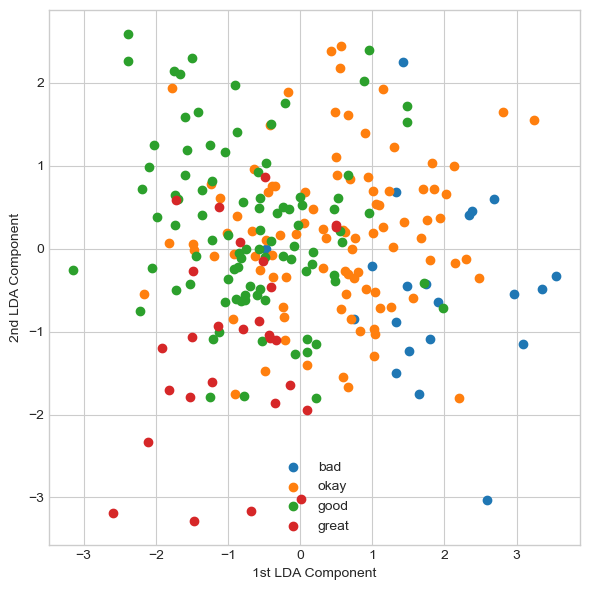

In [73]:
#Creating an instance of the LDA object, which is an object capable of learning and applying LDA from/to data.
#if we want to keep only a given number of components we can use the argument "n_components"

lda = LinearDiscriminantAnalysis()

#LDA needs BOTH features and labels (as integer numbers), other techniques needs only features
lda.fit(features_cleaned, labels)

#Now we project the data into a from a 4D to a (number of classes - 1) space,
#if the number of components in scikit-learn, LDA transform the data to a number of dimensions
#equal to min(n_classes - 1), which in our case is 4 classes -1 = 3.
#with more classess we will have more dimensions at the output of LDA projection
features_projected = lda.transform(features_cleaned)

#the dimensionality should be the same number of classes - 1
print(features_cleaned.shape)
print(features_projected.shape)

#Plot the distribution of the data according to the first two LDA components
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6))
    for lab_val, lab_name in zip(range(0,len(classes)),classes):
        plt.scatter(features_projected[labels==lab_val, 0],
                    features_projected[labels==lab_val, 1],
                    label=lab_name)
    plt.xlabel('1st LDA Component')
    plt.ylabel('2nd LDA Component')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# Grid Search

get a sense of where to start with the tuning of the metrics

In [74]:
#Import the classifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

print("avaliable model parameters")
print("MLP", mlp.get_params().keys())

avaliable model parameters
MLP dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])


In [75]:
crossval = RepeatedKFold(n_splits=5, n_repeats=100)

params = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [[100, 50, 30], [200, 100, 50], [100, 75, 50, 25], [100, 100, 50, 50]],
    'max_iter': [500, 1000, 2000, 5000, 10000],
}

gd_sr = GridSearchCV(estimator=mlp,
                     param_grid=params,
                     scoring='accuracy',
                     cv=crossval,  
                     n_jobs=-1) 

# was features_projected (after dimred)
# features_cleaned (if no dimred)
gd_sr.fit(features_projected, labels)

print('best set of parameters', gd_sr.best_params_)
print('associated best score',gd_sr.best_score_)

best set of parameters {'activation': 'identity', 'hidden_layer_sizes': [100, 100, 50, 50], 'max_iter': 500}
associated best score 0.6309920212765957


## Results
* PCA, 4 classes, only features = 0.189
* PCA, 4 classes, all features = 0.39 {'activation': 'relu', 'hidden_layer_sizes': [100, 50, 30], 'max_iter': 500}
* PCA, 4 classes, only analysis = 0.13
* LDA, 4 classes, all features = 0.62 {'activation': 'identity', 'hidden_layer_sizes': [100, 75, 50, 25], 'max_iter': 1000}
* LDA, 4 classes, all features, kfold(5,100) = 0.63 {'activation': 'identity', 'hidden_layer_sizes': [100, 100, 50, 50], 'max_iter': 500}
* LDA, 4 classes, only features = 0.47 {'activation': 'identity', 'hidden_layer_sizes': [100, 75, 50, 25], 'max_iter': 10000}
* LDA, 4 classes, only analysis = 0.53 {'activation': 'identity', 'hidden_layer_sizes': [100, 100, 50, 50], 'max_iter': 500}

* LDA, 5 classes, all features = 0.57 {'activation': 'identity', 'hidden_layer_sizes': [100, 50, 30], 'max_iter': 500}
* LDA, 5 classes, all features, kfold(5, 100) = 0.58 {'activation': 'identity', 'hidden_layer_sizes': [100, 50, 30], 'max_iter': 1000}